Simple A/b Test
https://medium.com/@panData/learn-how-to-perform-a-b-tests-in-python-6e3cdc00f6a9#:~:text=A%2FB%20tests%20are%20an,conversions%20or%20website%20dwell%20time.

Step 1 - Data Collection

In [1]:
import numpy as np


In [2]:
# Generating the data
version_A = np.random.normal(loc=10, scale=2, size=1000)
version_B = np.random.normal(loc=12, scale=2, size=1000)

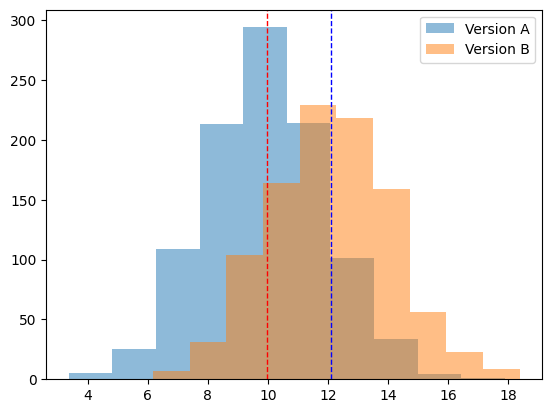

In [14]:
# Plotting the data
plt.hist(version_A, alpha=0.5, label='Version A')
plt.hist(version_B, alpha=0.5, label='Version B')
plt.axvline(mean_A, color='r', linestyle='dashed', linewidth=1)
plt.axvline(mean_B, color='b', linestyle='dashed', linewidth=1)
plt.legend(loc='upper right')
plt.show()

Step 2 - Perform A/B test

In [15]:
from scipy.stats import ttest_ind
# Performing the t-test
t, p = ttest_ind(version_A, version_B)

# Printing the result
print(f"t = {t:.3f}")
print(f"p = {p:.3f}")

t = -23.693
p = 0.000


# Bayesian A/b

In [16]:
from scipy.stats import beta
import numpy as np
from math import lgamma
from numba import jit
import matplotlib.pyplot as plt

defining the functions used

In [17]:
@jit
def h(a, b, c, d):
    num = lgamma(a + c) + lgamma(b + d) + lgamma(a + b) + lgamma(c + d)
    den = lgamma(a) + lgamma(b) + lgamma(c) + lgamma(d) + lgamma(a + b + c + d)
    return np.exp(num - den)

@jit
def g0(a, b, c):    
    return np.exp(lgamma(a + b) + lgamma(a + c) - (lgamma(a + b + c) + lgamma(a)))

@jit
def hiter(a, b, c, d):
    while d > 1:
        d -= 1
        yield h(a, b, c, d) / d

def g(a, b, c, d):
    return g0(a, b, c) + sum(hiter(a, b, c, d))

def calc_prob_between(beta1, beta2):
    return g(beta1.args[0], beta1.args[1], beta2.args[0], beta2.args[1])

C:\Users\charl\AppData\Local\Temp\ipykernel_22916\1805335027.py:1: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
C:\Users\charl\AppData\Local\Temp\ipykernel_22916\1805335027.py:7: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
C:\Users\charl\AppData\Local\Temp\ipykernel_22916\1805335027.py:11: NumbaDeprecationWarning: The 'nopython' keyword argument was

Data Collection - load campaign results

In [18]:
#This is the known data: imporessions and conversions for the Control and Test set
imps_ctrl,convs_ctrl=16500, 30 
imps_test, convs_test=17000, 50

Beta Functions

In [19]:
#here we create the Beta functions for the two sets
a_C, b_C = convs_ctrl+1, imps_ctrl-convs_ctrl+1
beta_C = beta(a_C, b_C)
a_T, b_T = convs_test+1, imps_test-convs_test+1
beta_T = beta(a_T, b_T)

calculating the lift

In [20]:

lift=(beta_T.mean()-beta_C.mean())/beta_C.mean()
lift

0.5967798854783688

calculating the probability for Test to be better than Control


In [21]:
prob=calc_prob_between(beta_T, beta_C)

print (f"Test option lift Conversion Rates by {lift*100:2.2f}% with {prob*100:2.1f}% probability.")


Test option lift Conversion Rates by 59.68% with 98.2% probability.
